In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
train_data = np.asarray(pd.read_csv("mnist_train.csv"))
test_data = np.asarray(pd.read_csv("mnist_test.csv"))

In [7]:
def show_image(data):
    data = data.reshape((28,28))
    plt.imshow(data, cmap="gray")

In [8]:
print(train_data.ndim,train_data.shape)

2 (59999, 785)


In [9]:
splitted_train = {i:train_data[train_data[:,0] == i][:,1:] for i in range(10)}
splitted_test  = {i:test_data[test_data[:,0] == i][:,1:] for i in range(10)}

In [10]:
def get_len(k):
    return len(splitted_train[k])

In [11]:
print("\n".join(f"{i}\t{get_len(i)}" for i in range(10)))

0	5923
1	6742
2	5958
3	6131
4	5842
5	5420
6	5918
7	6265
8	5851
9	5949


In [12]:
def get_mean_std(k):
    k_values = splitted_train[k]
    means = k_values.mean(axis=0)
    stds = k_values.std(axis=0)
    return means,stds

In [13]:
means_and_stds = [get_mean_std(k) for k in range(10)]

In [14]:
print(means_and_stds[9][1][300])

102.05914719625008


In [15]:
def pdf_of_class(x, i, k):
    mu,sigma = means_and_stds[k][0][i], means_and_stds[k][1][i]
    if sigma==0:
        return 1
    a = float(x-mu)/sigma
    return math.exp(-a*a/2.0) / (math.sqrt(2.0*math.pi) * sigma)

In [16]:
def predict(im_1):
    max_value, max_class = 0,0
    for k in range(10):
        p = 1.0
        for i in range(784):
            p_new = pdf_of_class(im_1[i],i,k)
            p*=p_new**0.17
        if p > max_value:
            max_value = p
            max_class = k
    return max_class,max_value

(8, 3.358190352490383e-197)


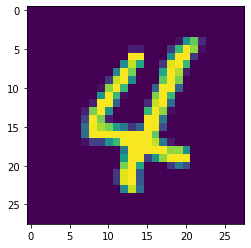

In [20]:
test_image = test_data[np.random.randint(0,len(test_data))][1:]
plt.imshow(test_image.reshape((28,28)))
print(predict(test_image))

In [ ]:
import tqdm
success = 0
for i in tqdm.tqdm(range(len(test_data))):
    test_image = test_data[i]
    predicted = predict(test_image[1:])[0]
    if predicted == test_image[0]:
        success+=1
print(success / len(test_data))